In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras import layers, models, regularizers

df = pd.read_csv('./csv/db_complementary_filter.csv')

X = df.drop(columns=['activity'])
y = df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test) 

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=10)

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(64, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,338 (138.04 KB)

 Trainable params: 35,338 (138.04 KB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5725 - loss: 1.1615 - val_accuracy: 0.7220 - val_loss: 0.7380
Epoch 2/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7359 - loss: 0.6994 - val_accuracy: 0.7610 - val_loss: 0.6305
Epoch 3/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7653 - loss: 0.6237 - val_accuracy: 0.7789 - val_loss: 0.5962
Epoch 4/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7787 - loss: 0.5859 - val_accuracy: 0.7831 - val_loss: 0.5638
Epoch 5/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7862 - loss: 0.5640 - val_accuracy: 0.7885 - val_loss: 0.5479
Epoch 6/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7917 - loss: 0.5515 - val_accuracy: 0.7968 - val_loss: 0.5366
Epoch 7/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7939 - loss: 0.5434 - val_accuracy: 0.7900 - val_loss: 0.5482
Epoch 8/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7974 - loss

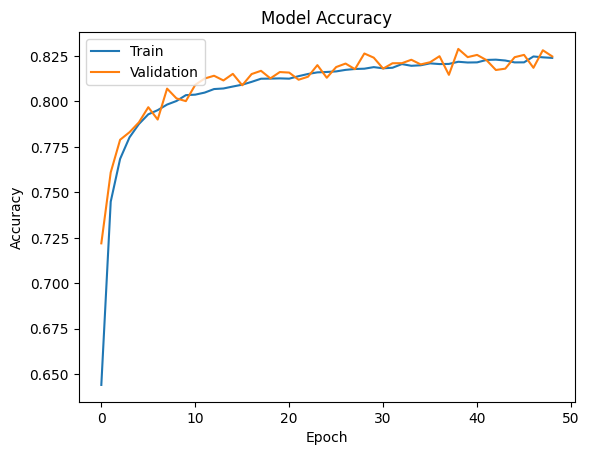

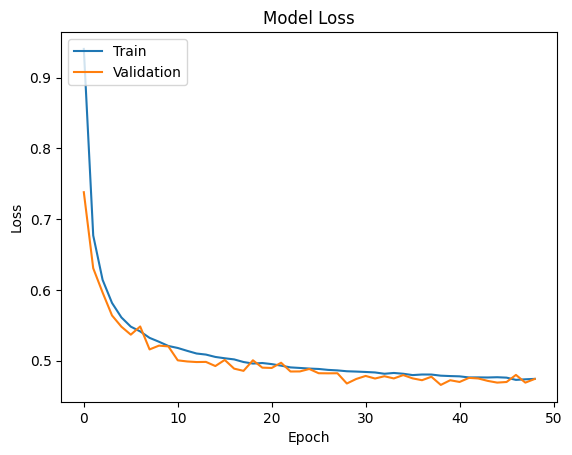

In [5]:
batch_size = 128
train_size = int(0.8 * len(X_train))
val_size = len(X_train) - train_size

full_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot))
full_dataset = full_dataset.shuffle(buffer_size=len(X_train))

train_dataset = full_dataset.take(train_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = full_dataset.skip(train_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [16]:
import tensorflow as tf
tf.profiler.experimental.start(logdir='./teste')
history = model.fit(train_dataset, epochs=50, validation_data=val_dataset)
tf.profiler.experimental.stop()


Epoch 1/50


2024-10-17 23:12:39.648978: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-10-17 23:12:39.649350: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-10-17 23:12:39.650665: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:892] Profiler found 1 GPUs


1009/1009 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8057 - loss: 0.5070 - val_accuracy: 0.8110 - val_loss: 0.4949
Epoch 2/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8074 - loss: 0.5061 - val_accuracy: 0.8098 - val_loss: 0.4989
Epoch 3/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8059 - loss: 0.5057 - val_accuracy: 0.8092 - val_loss: 0.4963
Epoch 4/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8079 - loss: 0.5018 - val_accuracy: 0.8032 - val_loss: 0.5035
Epoch 5/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8080 - loss: 0.5020 - val_accuracy: 0.8090 - val_loss: 0.5041
Epoch 6/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8070 - loss: 0.5032 - val_accuracy: 0.8102 - val_loss: 0.4936
Epoch 7/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8097 - loss: 0.4990 - val_accuracy: 0.8135 - val_loss: 0.4934
Epoch 8/50
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8086 - loss: 0.5017 - 

KeyboardInterrupt: 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras import layers, models, regularizers

df = pd.read_csv('./csv/db_complementary_filter.csv')

X = df.drop(columns=['activity'])
y = df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test) 

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=10)

""" mlp = MLPClassifier(
    activation="tanh", 
    alpha=0.0001, 
    hidden_layer_sizes=(200, 200), 
    learning_rate="constant", 
    solver="adam", 
    max_iter=1, 
    warm_start=True
) """

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(200, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(200, activation='tanh', kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 200)            │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,210 (184.41 KB)

 Trainable params: 47,210 (184.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5381 - loss: 1.2707 - val_accuracy: 0.6843 - val_loss: 0.8420
Epoch 2/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7038 - loss: 0.7817 - val_accuracy: 0.7530 - val_loss: 0.6702
Epoch 3/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7557 - loss: 0.6573 - val_accuracy: 0.7734 - val_loss: 0.6244
Epoch 4/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7721 - loss: 0.6140 - val_accuracy: 0.7740 - val_loss: 0.5951
Epoch 5/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7790 - loss: 0.5918 - val_accuracy: 0.7833 - val_loss: 0.5750
Epoch 6/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7836 - loss: 0.5734 - val_accuracy: 0.7875 - val_loss: 0.5669
Epoch 7/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7894 - loss: 0.5647 - val_accuracy: 0.7885 - val_loss: 0.5609
Epoch 8/100
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7906 - loss:

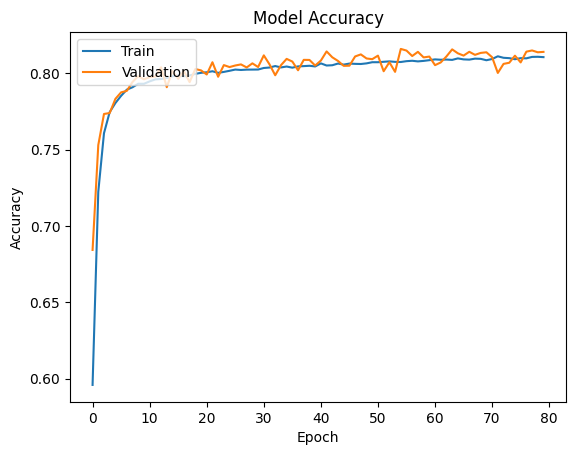

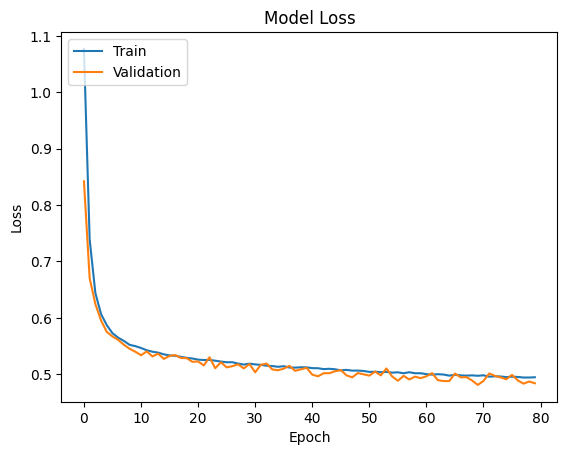

In [7]:
batch_size = 128
train_size = int(0.8 * len(X_train))
val_size = len(X_train) - train_size

full_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_one_hot))
full_dataset = full_dataset.shuffle(buffer_size=len(X_train))

train_dataset = full_dataset.take(train_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = full_dataset.skip(train_size).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=val_dataset,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
